# DubTech Datathon: Drug Overdose in USA

**Authors: Clement, Calvin, Tilova**

---

For our ML model, we decided to go with a simple linear regression by One-Hot encoding our columns along with the year column. This provided us with a model that reached just below 70% accuracy. 

## Introduction  

Dataset link : [CDC](https://data.cdc.gov/NCHS/Drug-overdose-death-rates-by-drug-type-sex-age-rac/95ax-ymtc/about_data)

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

# data vis
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Model metrics
from sklearn.metrics import mean_absolute_error

Since we need the `YEAR` column in our encoded dataset, we will concatenate it from our cleaned data file. 

In [2]:
# Dummy encoded dataset 
df_encoded = pd.read_csv('../data/encoded_drug_overdose_data.csv')
df_encoded.head()

,ESTIMATE,STUB_LABEL_15-24 years,STUB_LABEL_25-34 years,STUB_LABEL_35-44 years,STUB_LABEL_45-54 years,STUB_LABEL_55-64 years,STUB_LABEL_65-74 years,STUB_LABEL_75-84 years,STUB_LABEL_85 years and over,STUB_LABEL_All persons,...,STUB_LABEL_Male: Black or African American,STUB_LABEL_Male: Under 15 years,STUB_LABEL_Male: White,STUB_LABEL_Under 15 years,PANEL_All drug overdose deaths,PANEL_Drug overdose deaths involving any opioid,PANEL_Drug overdose deaths involving heroin,PANEL_Drug overdose deaths involving methadone,PANEL_Drug overdose deaths involving natural and semisynthetic opioids,PANEL_Drug overdose deaths involving other synthetic opioids (other than methadone)
0,6.1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,6.2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,6.8,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,8.2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,8.9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [3]:
# Cleaned dataset
df_clean = pd.read_csv('../data/clean_drug_overdose_data.csv')
df_clean.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9


In [4]:
# Concatenate year with the encoded dataset
df = pd.concat([df_encoded, df_clean['YEAR']], axis=1)
df.head()

,ESTIMATE,STUB_LABEL_15-24 years,STUB_LABEL_25-34 years,STUB_LABEL_35-44 years,STUB_LABEL_45-54 years,STUB_LABEL_55-64 years,STUB_LABEL_65-74 years,STUB_LABEL_75-84 years,STUB_LABEL_85 years and over,STUB_LABEL_All persons,...,STUB_LABEL_Male: Under 15 years,STUB_LABEL_Male: White,STUB_LABEL_Under 15 years,PANEL_All drug overdose deaths,PANEL_Drug overdose deaths involving any opioid,PANEL_Drug overdose deaths involving heroin,PANEL_Drug overdose deaths involving methadone,PANEL_Drug overdose deaths involving natural and semisynthetic opioids,PANEL_Drug overdose deaths involving other synthetic opioids (other than methadone),YEAR
0,6.1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1999
1,6.2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2000
2,6.8,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2001
3,8.2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2002
4,8.9,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2003


In [5]:
# Slice out dependent and independant variables
y = df.iloc[:, :1]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(5117, 47) (5117, 1)


In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Sanity check
X_train.shape, y_train.shape

((3837, 47), (3837, 1))

Since we are starting with a linear model, we should try and scale the data!

In [7]:
# Instantiate Standard Scaler
ss = StandardScaler()

# Fit & Transform data
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## SKLearn Linear Regression

In [8]:
# Instantiate linear regression
lin_reg = LinearRegression()

# Fit
lin_reg.fit(X_train_ss, y_train)

# Get r2 values
print(f'Train R2: {lin_reg.score(X_train_ss, y_train)}')
print(f'Test R2: {lin_reg.score(X_test_ss, y_test)}')

Train R2: 0.6998393107129035
Test R2: 0.6826327192056793


In [9]:
y_pred = lin_reg.predict(X_test_ss)

mean_absolute_error(y_test, y_pred)

2.4677666628299333

## Statsmodels OLS

- using statsmodels gives us more details about our linear regression model coefficients. 

In [10]:
import statsmodels.api as sm

In [11]:
# Adding constant 
X_train_ss_const = sm.add_constant(X_train_ss)

# Instantiating OLS
ols_regression = sm.OLS(y_train, X_train_ss_const)

# Fitting
ols_results = ols_regression.fit()

# Summary statistics
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ESTIMATE   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        01:22:38   Log-Likelihood:                -10294.
No. Observations:                3837   AIC:                         2.068e+04
Df Residuals:                    3791   BIC:                         2.097e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6916      0.058     80.548      0.000       4.577       4.806
x1          2.213e+12   2.02e+12      1.095      0.274   -1.75e+12    6.18e+12
x2          2.081e+12    1.9e+12      1.095      0.274   -1.65e+12    5.81e+12
x3          2.093e+12   1.91e+12      1.095      0.274   -1.66e+12    5.84e+12
x4          2.166e+12   1.98e+12      1.095      0.274   -1.71e+12    6.04e+12
x5          2.281e+12   2.08e+12      1.095      0.274    -1.8e+12    6.37e+12
x6          1.898e+12   1.73e+12      1.095      0.274    -1.5e+12     5.3e+12
x7          1.663e+12   1.52e+12      1.095      0.274   -1.32e+12    4.64e+12
x8          1.387e+12   1.27e+12      1.095      0.274    -1.1e+12    3.87e+12
x9           3.09e+12   2.82e+12      1.095      0.274   -2.44e+12    8.62e+12
x10         3.026e+12   2.76e+12      1.095      0.274   -2.39e+12    8.45e+12
x11         2.154e+12   1.97e+12      1.095      0.274    -1.7e+12    6.01e+12
x12         2.093e+12   1.91e+12      1.095      0.274   -1.66e+12    5.84e+12
x13         2.166e+12   1.98e+12      1.095      0.274   -1.71e+12    6.04e+12
x14         2.201e+12   2.01e+12      1.095      0.274   -1.74e+12    6.14e+12
x15         2.177e+12   1.99e+12      1.095      0.274   -1.72e+12    6.08e+12
x16         2.005e+12   1.83e+12      1.095      0.274   -1.59e+12     5.6e+12
x17         1.583e+12   1.45e+12      1.095      0.274   -1.25e+12    4.42e+12
x18         1.368e+12   1.25e+12      1.095      0.274   -1.08e+12    3.82e+12
x19         2.201e+12   2.01e+12      1.095      0.274   -1.74e+12    6.14e+12
x20         2.574e+12   2.35e+12      1.095      0.274   -2.04e+12    7.18e+12
x21         2.118e+12   1.93e+12      1.095      0.274   -1.67e+12    5.91e+12
x22         3.113e+12   2.84e+12      1.095      0.274   -2.46e+12    8.69e+12
x23          1.18e+12   1.08e+12      1.095      0.274   -9.34e+11    3.29e+12
x24         3.098e+12   2.83e+12      1.095      0.274   -2.45e+12    8.65e+12
x25         3.042e+12   2.78e+12      1.095      0.274   -2.41e+12    8.49e+12
x26         2.166e+12   1.98e+12      1.095      0.274   -1.71e+12    6.04e+12
x27         2.189e+12      2e+12      1.095      0.274   -1.73e+12    6.11e+12
x28         2.118e+12   1.93e+12      1.095      0.274   -1.67e+12    5.91e+12
x29         2.177e+12   1.99e+12      1.095      0.274   -1.72e+12    6.08e+12
x30         2.189e+12      2e+12      1.095      0.274   -1.73e+12    6.11e+12
x31         1.979e+12   1.81e+12      1.095      0.274   -1.57e+12    5.52e+12
x32         1.406e+12   1.28e+12      1.095      0.274   -1.11e+12    3.92e+12
x33         1.086e+12   9.92e+11      1.095      0.274   -8.59e+11    3.03e+12
x34         2.292e+12   2.09e+12      1.095      0.274   -1.81e+12     6.4e+12
x35         2.651e+12   2.42e+12      1.095      0.274    -2.1e+12     7.4e+12
x3

In [12]:
ols_pred = ols_results.predict(sm.add_constant(X_test_ss))
ols_pred

array([ 6.48535156, 13.06933594, -2.36914062, ..., 12.01953125,
        9.96679688, 10.78710938])

In [13]:
mean_absolute_error(y_test, ols_pred)

2.475563812255859

### Assumptions

Linear Regression models assume 4 things:
1. There is a linear relationship between our independent and dependent variables
2. Independent variables are not correlated with each other 
3. Residuals are normally distributed
4. Homoscedasticity

Let's check for these with our model. 

#### Assumption 1
First, let's check for linear relationships between our independent columns and dependent column.

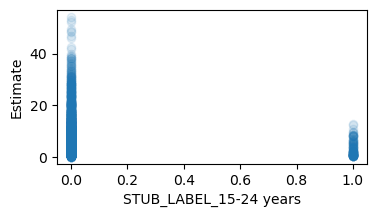

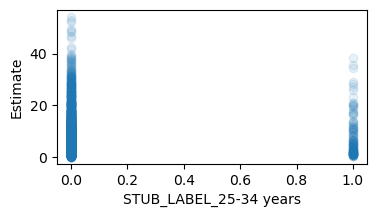

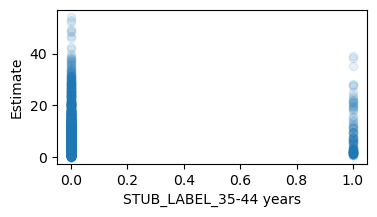

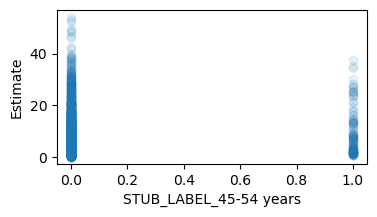

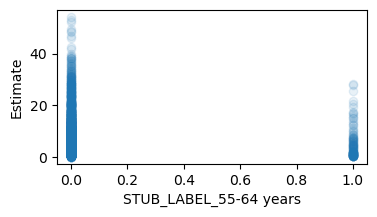

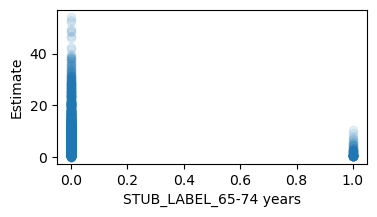

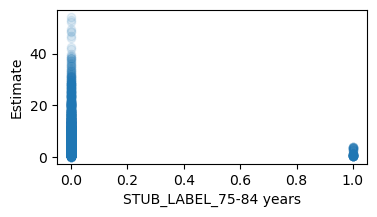

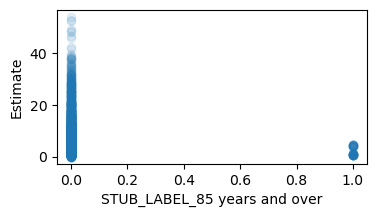

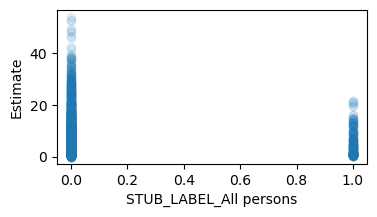

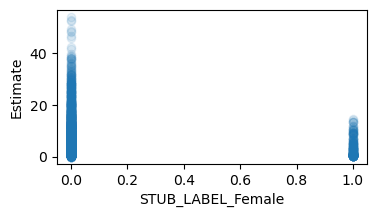

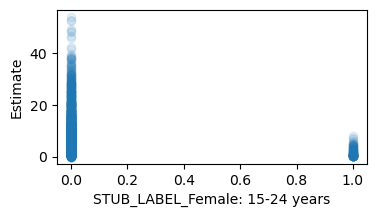

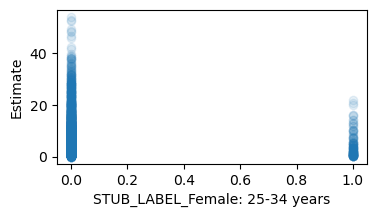

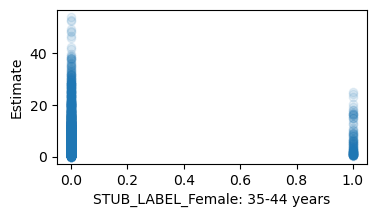

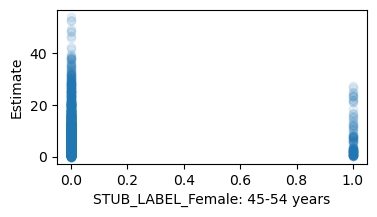

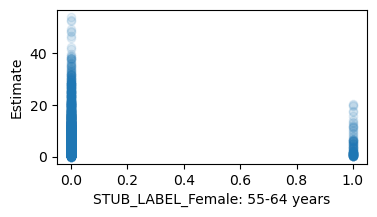

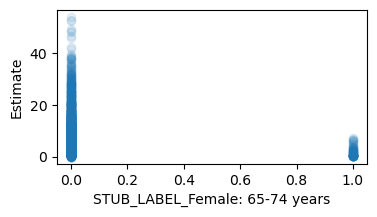

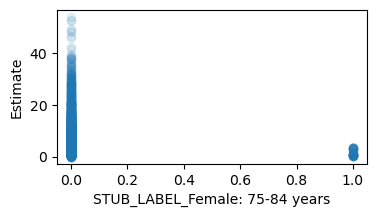

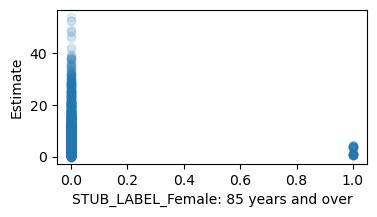

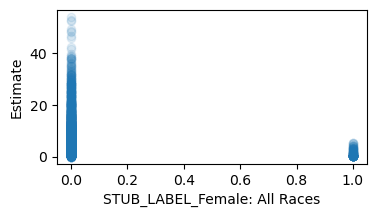

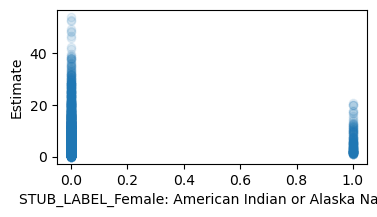

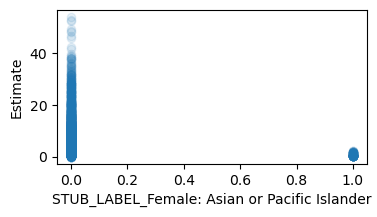

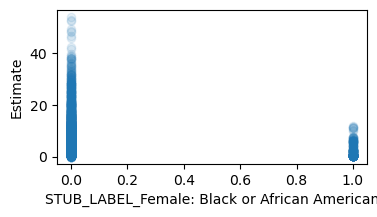

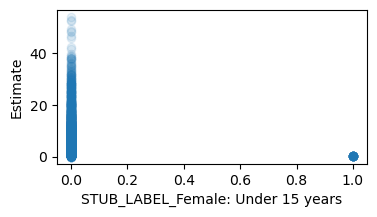

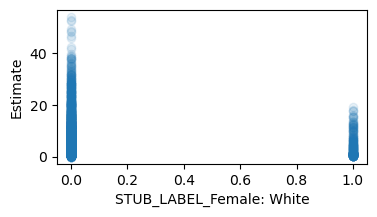

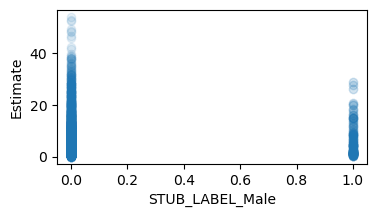

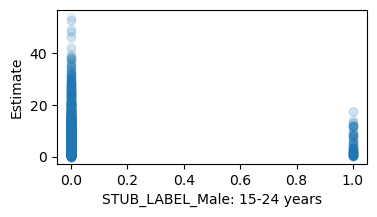

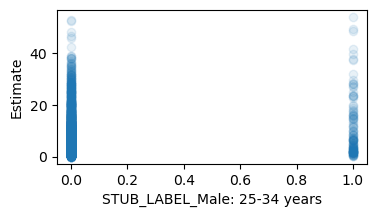

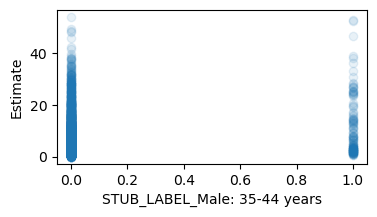

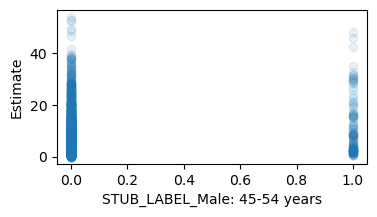

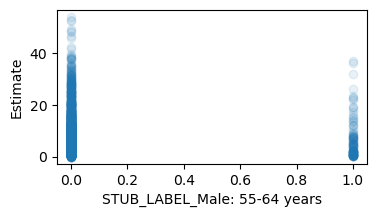

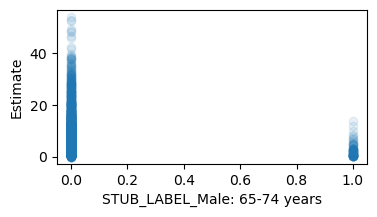

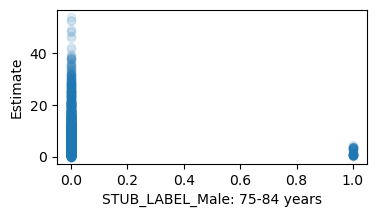

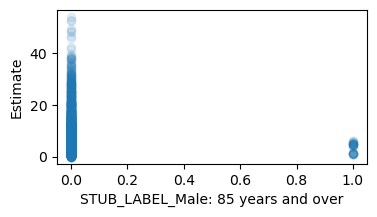

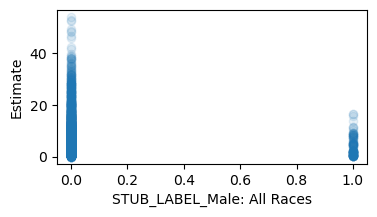

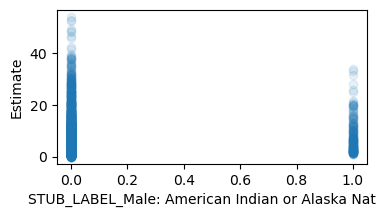

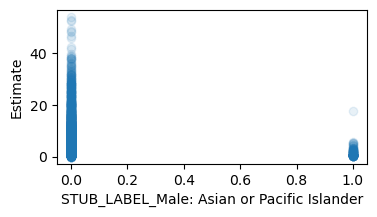

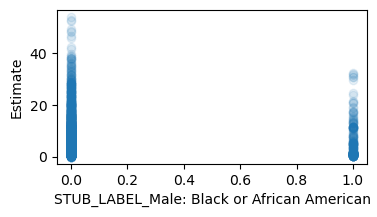

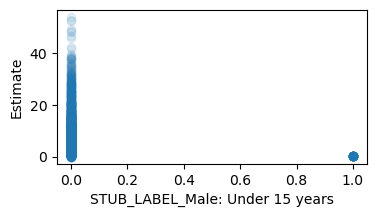

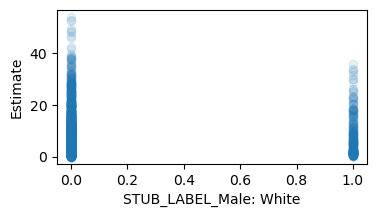

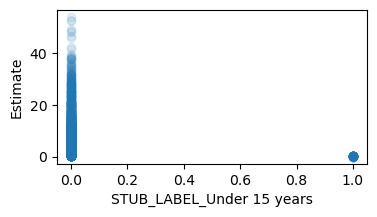

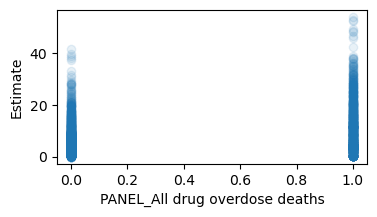

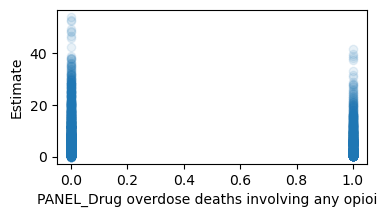

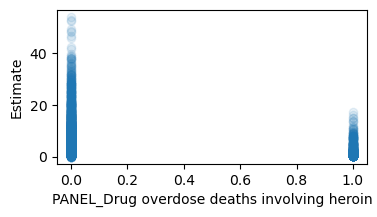

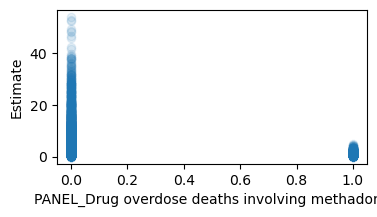

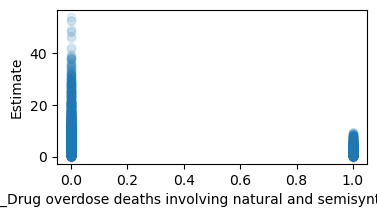

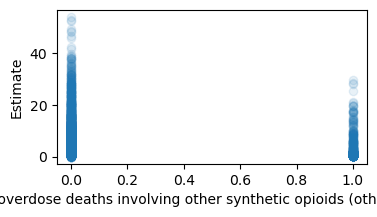

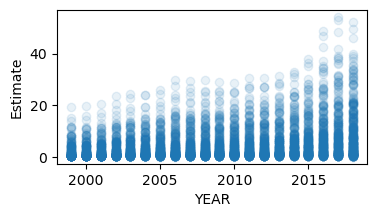

In [14]:
# Assumption 1: Linear relationship between independent and dependent variables

for col in X.columns:
    plt.figure(figsize=(4, 2))
    plt.scatter(X[col], y, alpha=0.1)
    plt.xlabel(col)
    plt.ylabel('Estimate')
    plt.show()

Plotting all our independent columns with the dependent variable we see that since most of our columns are dummy columns it is hard to distinguish if there is a linear relationship or not. 

#### Assumption 2
Let's check for correlation in the independent variables.


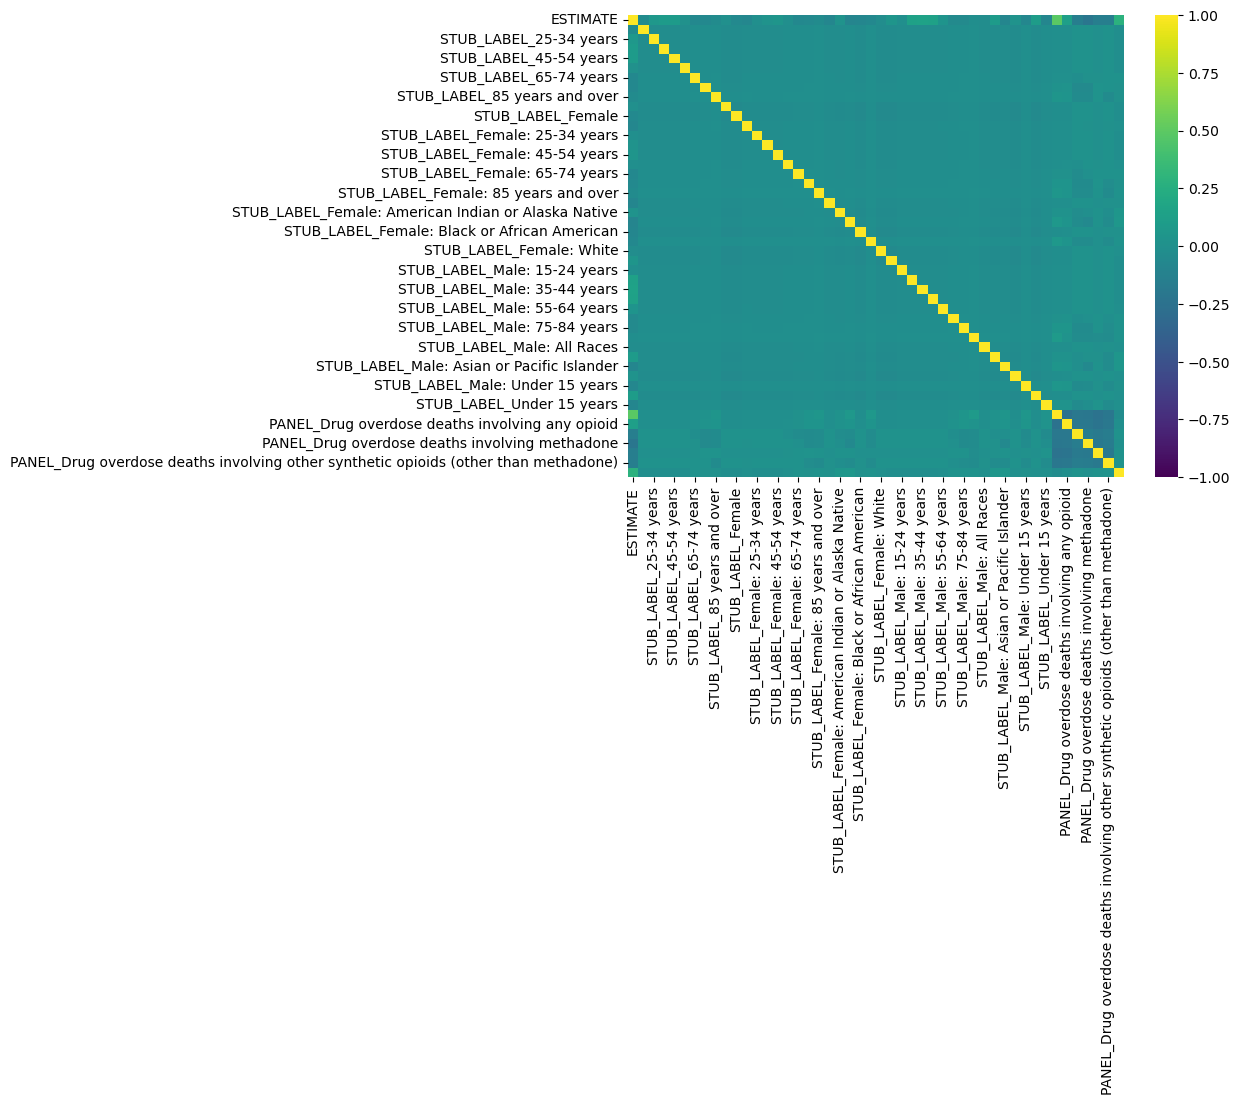

In [15]:
# Assumption 2: Independent variable correlation
df_corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, cmap='viridis',)
plt.show()

We can see from this heatmap that our independent variables are not correlated with each other which satisfies the assumption for a linear model. 

#### Assumption 3
Now let's check for residuals.

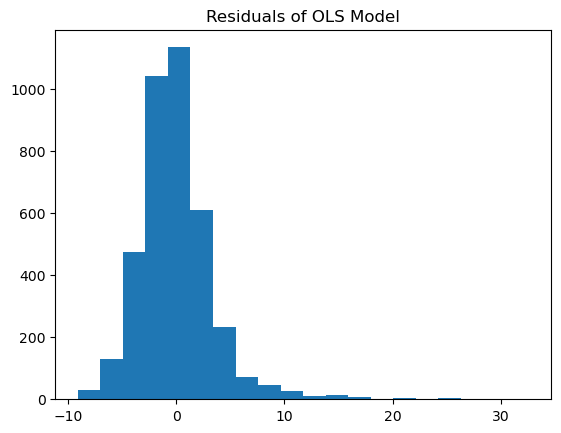

In [16]:
# Residuals
ols_resid = ols_results.resid

plt.figure()
plt.hist(ols_resid, bins=20)
plt.title("Residuals of OLS Model")
plt.show()

As we can see from the residuals, it follows a normal distribution which satisfies assumption 3.

#### Assumption 4
Moving on to assumption 4, we check for homoscedasticity.

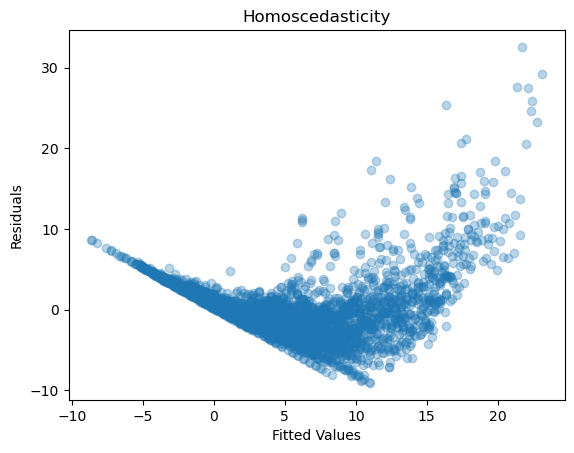

In [17]:
# Checking for homoscedasticity
ols_fitted = ols_results.fittedvalues

plt.figure()
plt.scatter(ols_fitted, ols_resid, alpha=0.3)
plt.title('Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Looking at this plot we see that it is some what randomly distributed.